In [25]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [18]:
cols = ['sentiment','id','date','query_string','user','text']

In [19]:
df = pd.read_csv("training.csv", header=None, names=cols)

In [20]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
df.sentiment.value_counts()

0    183533
Name: sentiment, dtype: int64

In [22]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [24]:
df['pre_clean_len'] = [len(t) for t in df.text]

In [26]:
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.text.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)


{'dataset_shape': (183533, 3),
 'pre_clean_len': {'description': 'Length of the tweet before cleaning',
                   'type': dtype('int64')},
 'sentiment': {'description': 'sentiment class - 0:negative, 1:positive',
               'type': dtype('int64')},
 'text': {'description': 'tweet text', 'type': dtype('O')}}


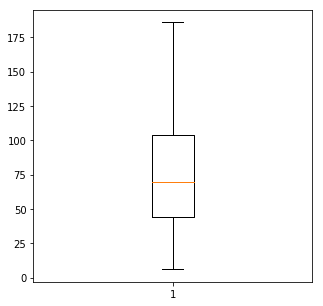

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()

In [28]:
df[df.pre_clean_len > 140].head(10)

,sentiment,text,pre_clean_len
201,0,Awwh babs... you look so sad underneith that s...,142
267,0,Whinging. My client&amp;boss don't understand ...,145
331,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
388,0,#3 woke up and was having an accident - &quot;...,144
452,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
480,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
735,0,Have an invite for &quot;Healthy Dining&quot; ...,141
945,0,Damnit I was really digging this season of Rea...,141
1052,0,Why do I keep looking...I know that what I rea...,141
1059,0,Used the term &quot;Fail Whale&quot; to a clie...,148


In [31]:
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.text[279], 'lxml')
print (example1.get_text())

I'm afraid I had bad code. 


In [32]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])

'http://twitpic.com/2y2yi - I love you, Buck. '

In [33]:
re.sub('https?://[A-Za-z0-9./]+','',df.text[0])


"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [43]:
re.sub("[^a-zA-Z]", " ", df.text[164])

' ColinDeMar Far too out of the way for rail   any other tips '

In [47]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

testing = df.text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera',
 'spring break in plain city it s snowing',
 'i just re pierced my ears',
 'i couldn t bear to watch it and i thought the ua loss was embarrassing',
 'it it counts idk why i did either you never talk to me anymore',
 'i would ve been the first but i didn t have a gun not really though zac snyder s just a doucheclown',
 'i wish i got to watch it with you i miss you and how was the premiere',
 'hollis death scene will hurt

In [55]:
nums = [0,180000]
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    if( (i+1)%10000 == 0 ):
        print ("Tweets %d of %d has been processed" % ( i+1, nums[1] ))
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))

Cleaning and parsing the tweets...

Tweets 10000 of 180000 has been processed
Tweets 20000 of 180000 has been processed
Tweets 30000 of 180000 has been processed
Tweets 40000 of 180000 has been processed
Tweets 50000 of 180000 has been processed
Tweets 60000 of 180000 has been processed
Tweets 70000 of 180000 has been processed
Tweets 80000 of 180000 has been processed
Tweets 90000 of 180000 has been processed
Tweets 100000 of 180000 has been processed
Tweets 110000 of 180000 has been processed
Tweets 120000 of 180000 has been processed
Tweets 130000 of 180000 has been processed
Tweets 140000 of 180000 has been processed
Tweets 150000 of 180000 has been processed
Tweets 160000 of 180000 has been processed
Tweets 170000 of 180000 has been processed
Tweets 180000 of 180000 has been processed


In [56]:
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df['target'] = df.sentiment
clean_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [57]:
clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
my_df = pd.read_csv(csv,index_col=0)
my_df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [58]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180000 entries, 0 to 179999
Data columns (total 2 columns):
text      179689 non-null object
target    180000 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


In [59]:
my_df[my_df.isnull().any(axis=1)].head()

,text,target
196,NaN,0
237,NaN,0
386,NaN,0
418,NaN,0
999,NaN,0


In [60]:
np.sum(my_df.isnull().any(axis=1))

311

In [61]:
my_df.isnull().any(axis=0)

text       True
target    False
dtype: bool

In [62]:
my_df.dropna(inplace=True)
my_df.reset_index(drop=True,inplace=True)
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179689 entries, 0 to 179688
Data columns (total 2 columns):
text      179689 non-null object
target    179689 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.7+ MB


## Word Cloud

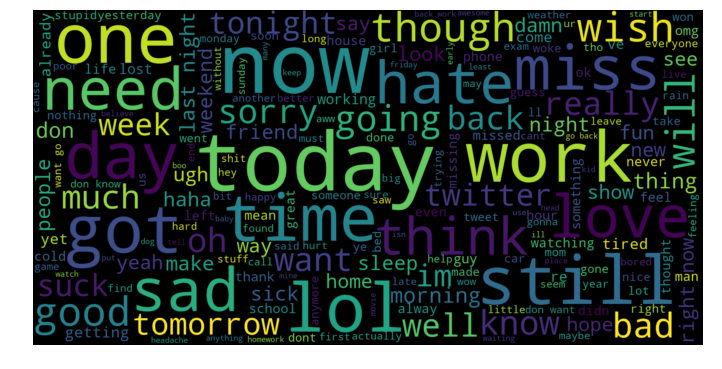

In [65]:
neg_tweets = my_df[my_df.target == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [67]:
for t in neg_tweets.text[:200]:
    if 'love' in t:
        print (t)

ahh ive always wanted to see rent love the soundtrack
meh almost lover is the exception this track gets me depressed every time
awe i love you too am here i miss you
damn the grind is inspirational and saddening at the same time don t want you to stop cuz i like what u do much love
i m missing you babe but as long as your alive i m happy yawwwnn i m tired my love imma try to sleep hopefully you had a headstart
love the french i tell people here in the south i m qtr french and they snarl at me french are beautiful people


In [68]:
pos_tweets = my_df[my_df.target == 1]
print(pos_tweets)

Empty DataFrame
Columns: [text, target]
Index: []


In [69]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit(my_df.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [70]:
len(cvec.get_feature_names())

68892

In [71]:
document_matrix = cvec.transform(my_df.text)
my_df[my_df.target == 0].tail()

,text,target
179684,you should be here,0
179685,i miss you where are you d,0
179686,ugh shut up i hate you i just can t bring myse...,0
179687,can i not use the blue controller on scene it ...,0
179688,had yo come home early cos i ran out of money ...,0
